## Notebook for formatting data frames for phase association

In [29]:
import os
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from pnwstore.mseed import WaveformClient
from obspy import UTCDateTime
from obspy.core.stream import Stream





In [3]:
# Make a directory to store the data associated with the picks
filepath = '../data/datasets_all_regions/'
os.makedirs(filepath,exist_ok=True)

### 1.2 Concatenate data frames from several stations and format 

In [13]:
# Gather all the files that we produced in 1_parallel_detect_picks_elep_all_sta
csv_list = glob.glob('../data/picks_201*/*.csv')

In [14]:
# Print csv_list
csv_list

['../data/picks_20120101/BABR_20120101.csv',
 '../data/picks_20120101/LEBA_20120101.csv',
 '../data/picks_20120101/DBO_20120101.csv',
 '../data/picks_20120101/L02D_20120101.csv',
 '../data/picks_20120101/KSXB_20120101.csv',
 '../data/picks_20120101/KCT_20120101.csv',
 '../data/picks_20120101/FN07A_20120101.csv',
 '../data/picks_20120101/NLLB_20120101.csv',
 '../data/picks_20120101/FN08A_20120101.csv',
 '../data/picks_20120101/FN18A_20120101.csv',
 '../data/picks_20120101/G03D_20120101.csv',
 '../data/picks_20120101/SHB_20120101.csv',
 '../data/picks_20120101/J34A_20120101.csv',
 '../data/picks_20120101/J73A_20120101.csv',
 '../data/picks_20120101/FN01A_20120101.csv',
 '../data/picks_20120101/M07A_20120101.csv',
 '../data/picks_20120101/I02D_20120101.csv',
 '../data/picks_20120101/J57A_20120101.csv',
 '../data/picks_20120101/I03D_20120101.csv',
 '../data/picks_20120101/LRIV_20120101.csv',
 '../data/picks_20120101/J33A_20120101.csv',
 '../data/picks_20120101/M06A_20120101.csv',
 '../data

In [15]:
#  Concatenate all the picks in all the files produced in 1_parallel_detect_picks_elep_all_sta
all_csv =[]


for i in csv_list:
    temp = pd.read_csv(i,index_col=0)
    all_csv.append(temp)
    
df = pd.concat(all_csv, axis=0)

/tmp/ipykernel_681755/3549658960.py:9: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df = pd.concat(all_csv, axis=0)
/tmp/ipykernel_681755/3549658960.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(all_csv, axis=0)


In [16]:
# Print df
df[0:10]

,event_id,source_type,station_network_code,station_channel_code,station_code,station_location_code,station_latitude_deg,station_longitude_deg,station_elevation_m,trace_name,trace_sampling_rate_hz,trace_start_time,trace_S_arrival_sample,trace_P_arrival_sample,trace_S_onset,trace_P_onset,trace_snr_db,trace_s_arrival,trace_p_arrival
0,,,UW,,BABR,NaN,44.62132,-123.78924,438.7,,40.0,2012-01-01T00:00:00.005000Z,,,,,,NaN,2012-01-01T01:34:39.380000Z
1,,,UW,,BABR,NaN,44.62132,-123.78924,438.7,,40.0,2012-01-01T00:00:00.005000Z,,,,,,NaN,2012-01-01T01:49:06.705000Z
2,,,UW,,BABR,NaN,44.62132,-123.78924,438.7,,40.0,2012-01-01T00:00:00.005000Z,,,,,,NaN,2012-01-01T04:39:44.430000Z
3,,,UW,,BABR,NaN,44.62132,-123.78924,438.7,,40.0,2012-01-01T00:00:00.005000Z,,,,,,NaN,2012-01-01T17:47:22.280000Z
4,,,UW,,BABR,NaN,44.62132,-123.78924,438.7,,40.0,2012-01-01T00:00:00.005000Z,,,,,,NaN,2012-01-01T18:54:27.080000Z
5,,,UW,,BABR,NaN,44.62132,-123.78924,438.7,,40.0,2012-01-01T00:00:00.005000Z,,,,,,2012-01-01T01:23:07.055000Z,NaN
6,,,UW,,BABR,NaN,44.62132,-123.78924,438.7,,40.0,2012-01-01T00:00:00.005000Z,,,,,,2012-01-01T03:25:00.555000Z,NaN
7,,,UW,,BABR,NaN,44.62132,-123.78924,438.7,,40.0,2012-01-01T00:00:00.005000Z,,,,,,2012-01-01T05:48:37.030000Z,NaN
8,,,UW,,BABR,NaN,44.62132,-123.78924,438.7,,40.0,2012-01-01T00:00:00.005000Z,,,,,,2012-01-01T06:53:37.555000Z,NaN
9,,,UW,,BABR,NaN,44.62132,-123.78924,438.7,,40.0,2012-01-01T00:00:00.005000Z,,,,,,2012-01-01T09:21:36.180000Z,NaN


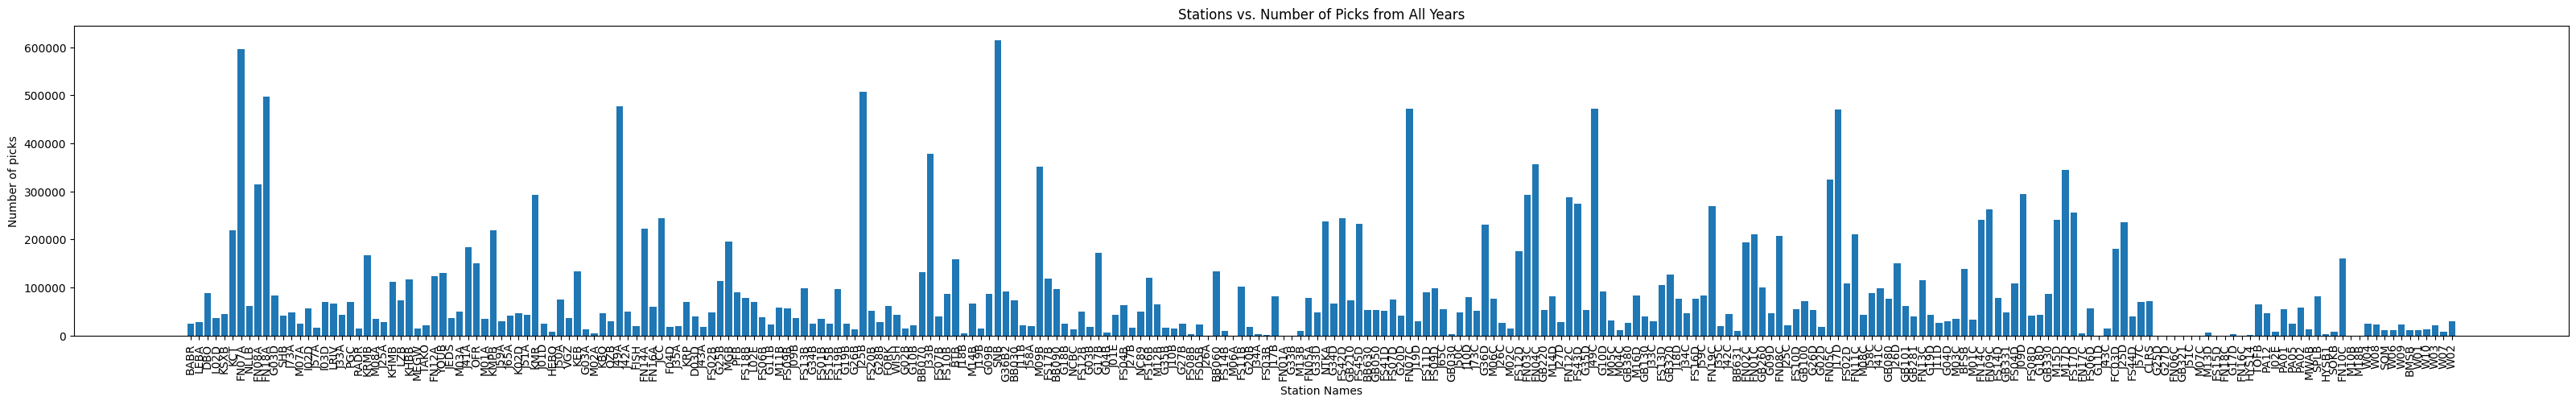

In [17]:
# Append the number of picks for each station to a list
# Create a list of stations 
ls_sta = df.drop_duplicates(subset='station_code')[['station_network_code','station_code']]
# Create a list that contain the number of picks for each station
num_picks = []
for i in ls_sta['station_code'].values:
    _num_picks = len(df[df['station_code']==i])
    num_picks.append(_num_picks)

# Create a figure
fig = plt.figure(figsize=(40,5))
# Horizontal Bar Plot
plt.bar(ls_sta['station_code'].values, num_picks)
plt.xlabel('Station Names')
plt.ylabel('Number of picks')
plt.xticks(rotation=90) # Rotate the x-axis labels
plt.title(f'Stations vs. Number of Picks from All Years') # Set the title 
# Show Plot
plt.savefig(f'../data/datasets_all_regions/station_picks_all_years.pdf', format='pdf')

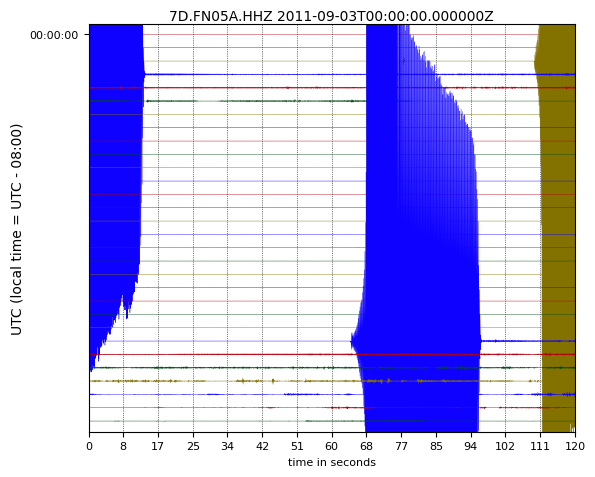

In [52]:
client_waveform = WaveformClient()

day = 1
time_interval = 1
starttime = UTCDateTime(year=2011, month=9, day=3,hour=0,minute=0,second=0)
endtime = UTCDateTime(year=2011, month=9, day=3,hour=0+time_interval,minute=0,second=0)

try:
    network = '7D'
    station = 'FN05A'
    channel = '?HZ'
    st = client_waveform.get_waveforms(network=network, station=station, channel=channel, starttime=starttime, endtime=endtime)
except obspy.clients.fdsn.header.FDSNNoDataException:
    st = Stream()
    print(f"WARNING: No data for {network}.{station}.{channel} on {starttime}.")  

_st = Stream()
# Check for HH and BH channels presence
has_HH = bool(st.select(channel="HH?"))
has_BH = bool(st.select(channel="BH?"))

# Apply selection logic based on channel presence
if has_HH and has_BH:
    # If both HH and BH channels are present, select only HH
    _st += st.select(channel="HH?")
elif has_HH:
    # If only HH channels are present
    _st += st.select(channel="HH?")
elif has_BH:
    # If only BH channels are present
    _st += st.select(channel="BH?")

st = _st

if len(st) == 0:
    print(f"WARNING: No stream data for {network}.{station}.{channel} from {starttime} to {endtime}")


else:
    channel = st[0].stats.channel 
    fig = plt.figure()
    st.filter(type='bandpass', freqmin=4, freqmax=15)
    st[0].plot(linewidth=0.3,title=f'{network}.{station}.{channel} {starttime}',fig=fig,type='dayplot',interval=2,vertical_scaling_range=1e4)
    plt.savefig(f'../data/datasets_all_regions/{station}.pdf',format='pdf')

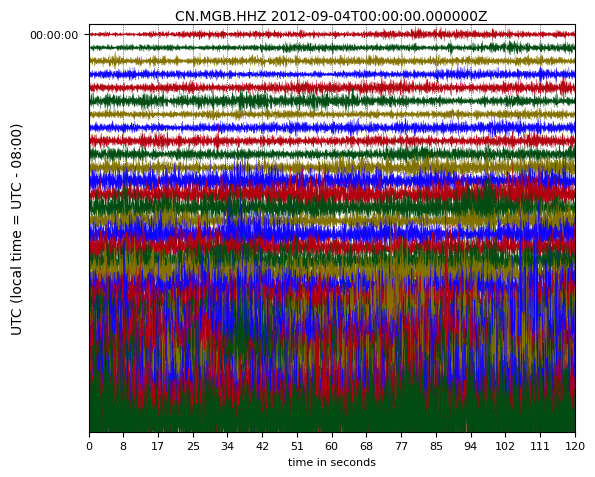

In [54]:
client_waveform = WaveformClient()

day = 1
time_interval = 1
starttime = UTCDateTime(year=2012, month=9, day=4,hour=0,minute=0,second=0)
endtime = UTCDateTime(year=2012, month=9, day=4,hour=0+time_interval,minute=0,second=0)

try:
    network = 'CN'
    station = 'MGB'
    channel = '?HZ'
    st = client_waveform.get_waveforms(network=network, station=station, channel=channel, starttime=starttime, endtime=endtime)
except obspy.clients.fdsn.header.FDSNNoDataException:
    st = Stream()
    print(f"WARNING: No data for {network}.{station}.{channel} on {starttime}.")  

_st = Stream()
# Check for HH and BH channels presence
has_HH = bool(st.select(channel="HH?"))
has_BH = bool(st.select(channel="BH?"))

# Apply selection logic based on channel presence
if has_HH and has_BH:
    # If both HH and BH channels are present, select only HH
    _st += st.select(channel="HH?")
elif has_HH:
    # If only HH channels are present
    _st += st.select(channel="HH?")
elif has_BH:
    # If only BH channels are present
    _st += st.select(channel="BH?")

st = _st

if len(st) == 0:
    print(f"WARNING: No stream data for {network}.{station}.{channel} from {starttime} to {endtime}")


else:
    channel = st[0].stats.channel 
    fig = plt.figure()
    st.filter(type='bandpass', freqmin=4, freqmax=15)
    st[0].plot(linewidth=0.3,title=f'{network}.{station}.{channel} {starttime}',fig=fig,type='dayplot',interval=2,vertical_scaling_range=1e3)
    plt.savefig(f'../data/datasets_all_regions/{station}.pdf',format='pdf')

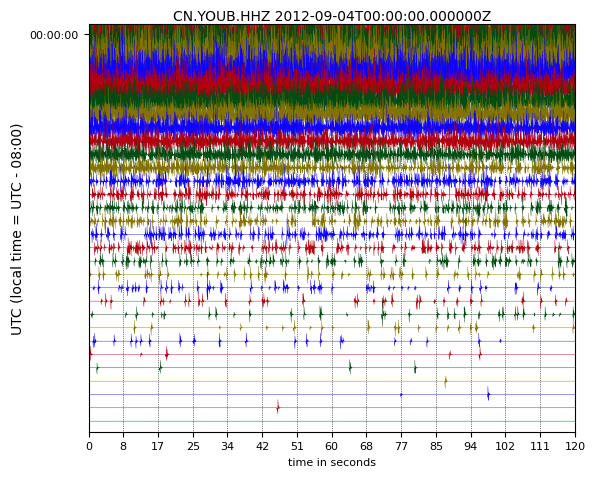

In [46]:
client_waveform = WaveformClient()

day = 1
time_interval = 1
starttime = UTCDateTime(year=2012, month=9, day=4,hour=0,minute=0,second=0)
endtime = UTCDateTime(year=2012, month=9, day=4,hour=0+time_interval,minute=0,second=0)

try:
    network = 'CN'
    station = 'YOUB'
    channel = '?HZ'
    st = client_waveform.get_waveforms(network=network, station=station, channel=channel, starttime=starttime, endtime=endtime)
except obspy.clients.fdsn.header.FDSNNoDataException:
    st = Stream()
    print(f"WARNING: No data for {network}.{station}.{channel} on {starttime}.")  

_st = Stream()
# Check for HH and BH channels presence
has_HH = bool(st.select(channel="HH?"))
has_BH = bool(st.select(channel="BH?"))

# Apply selection logic based on channel presence
if has_HH and has_BH:
    # If both HH and BH channels are present, select only HH
    _st += st.select(channel="HH?")
elif has_HH:
    # If only HH channels are present
    _st += st.select(channel="HH?")
elif has_BH:
    # If only BH channels are present
    _st += st.select(channel="BH?")

st = _st

if len(st) == 0:
    print(f"WARNING: No stream data for {network}.{station}.{channel} from {starttime} to {endtime}")


else:
    channel = st[0].stats.channel 
    fig = plt.figure()
    st.filter(type='bandpass', freqmin=4, freqmax=15)
    st[0].plot(linewidth=0.3,title=f'{network}.{station}.{channel} {starttime}',fig=fig,type='dayplot',interval=2,vertical_scaling_range=1e6)
    plt.savefig(f'../data/datasets_all_regions/{station}.pdf',format='pdf')

In [7]:
# Remove picks with the following stations due to the noise: 'FN05A', 'YOUB' and 'MGB'
df = df[~df['station_code'].isin(['FN05A', 'YOUB', 'MGB'])]

In [8]:
df.to_csv('../data/datasets_all_regions/all_picks_all_years_for_picking.csv')

In [8]:
len(df)

6311141

### 1.3 Create a CSV file for picks for the association

In [10]:
# Assign P to P phases in the df
p_phase = df.loc[df['trace_p_arrival'].notna(), 'phase'] = "P"

In [11]:
# Filter the df 
p_stas_picks_phase = df.loc[df['trace_p_arrival'].notna(), ['station_code','trace_p_arrival','phase']]
p_stas_picks_phase

,station_code,trace_p_arrival,phase
0,D03D,2014-03-04T00:40:01.700000Z,P
1,D03D,2014-03-04T12:41:25.775000Z,P
2,D03D,2014-03-04T21:19:55.500000Z,P
3,D03D,2014-03-04T23:00:32.775000Z,P
4,D03D,2014-03-04T23:13:32.850000Z,P
...,...,...,...
119,GB080,2014-05-31T22:52:24.131018Z,P
120,GB080,2014-05-31T23:17:10.240904Z,P
121,GB080,2014-05-31T23:40:50.980796Z,P
122,GB080,2014-05-31T23:57:50.720718Z,P


In [12]:
# Rename the df
_p_stas_picks_phase = p_stas_picks_phase.rename(columns={"station_code": "station", "trace_p_arrival": "time"})
_p_stas_picks_phase

,station,time,phase
0,D03D,2014-03-04T00:40:01.700000Z,P
1,D03D,2014-03-04T12:41:25.775000Z,P
2,D03D,2014-03-04T21:19:55.500000Z,P
3,D03D,2014-03-04T23:00:32.775000Z,P
4,D03D,2014-03-04T23:13:32.850000Z,P
...,...,...,...
119,GB080,2014-05-31T22:52:24.131018Z,P
120,GB080,2014-05-31T23:17:10.240904Z,P
121,GB080,2014-05-31T23:40:50.980796Z,P
122,GB080,2014-05-31T23:57:50.720718Z,P


In [13]:
# Assign S to S phases in the df
s_phase = df.loc[df['trace_s_arrival'].notna(), 'phase'] = "S"# Filter the df 

In [14]:
# Filter the df 
s_stas_picks_phase = df.loc[df['trace_s_arrival'].notna(), ['station_code','trace_s_arrival','phase']]
s_stas_picks_phase

,station_code,trace_s_arrival,phase
5,D03D,2014-03-04T00:40:20.775000Z,S
6,D03D,2014-03-04T12:41:29.875000Z,S
7,D03D,2014-03-04T17:12:10.900000Z,S
8,D03D,2014-03-04T18:43:13.500000Z,S
9,D03D,2014-03-04T23:00:46.550000Z,S
...,...,...,...
320,GB080,2014-05-31T21:52:41.991291Z,S
321,GB080,2014-05-31T22:58:31.520990Z,S
322,GB080,2014-05-31T23:43:05.420786Z,S
323,GB080,2014-05-31T23:45:31.110774Z,S


In [15]:
# Rename the df
_s_stas_picks_phase = s_stas_picks_phase.rename(columns={"station_code": "station", "trace_s_arrival": "time"})
_s_stas_picks_phase

,station,time,phase
5,D03D,2014-03-04T00:40:20.775000Z,S
6,D03D,2014-03-04T12:41:29.875000Z,S
7,D03D,2014-03-04T17:12:10.900000Z,S
8,D03D,2014-03-04T18:43:13.500000Z,S
9,D03D,2014-03-04T23:00:46.550000Z,S
...,...,...,...
320,GB080,2014-05-31T21:52:41.991291Z,S
321,GB080,2014-05-31T22:58:31.520990Z,S
322,GB080,2014-05-31T23:43:05.420786Z,S
323,GB080,2014-05-31T23:45:31.110774Z,S


In [16]:
# Concatenate the P and S picks
picks = pd.concat(objs = [_p_stas_picks_phase,_s_stas_picks_phase] , axis=0)
picks

,station,time,phase
0,D03D,2014-03-04T00:40:01.700000Z,P
1,D03D,2014-03-04T12:41:25.775000Z,P
2,D03D,2014-03-04T21:19:55.500000Z,P
3,D03D,2014-03-04T23:00:32.775000Z,P
4,D03D,2014-03-04T23:13:32.850000Z,P
...,...,...,...
320,GB080,2014-05-31T21:52:41.991291Z,S
321,GB080,2014-05-31T22:58:31.520990Z,S
322,GB080,2014-05-31T23:43:05.420786Z,S
323,GB080,2014-05-31T23:45:31.110774Z,S


In [17]:
# Swap the time and phase columns
picks = picks.iloc[:,[0,2,1]]
picks = picks.reset_index(drop=True)
picks

,station,phase,time
0,D03D,P,2014-03-04T00:40:01.700000Z
1,D03D,P,2014-03-04T12:41:25.775000Z
2,D03D,P,2014-03-04T21:19:55.500000Z
3,D03D,P,2014-03-04T23:00:32.775000Z
4,D03D,P,2014-03-04T23:13:32.850000Z
...,...,...,...
6311136,GB080,S,2014-05-31T21:52:41.991291Z
6311137,GB080,S,2014-05-31T22:58:31.520990Z
6311138,GB080,S,2014-05-31T23:43:05.420786Z
6311139,GB080,S,2014-05-31T23:45:31.110774Z


In [18]:
# Save the these picks to the data folder
picks.to_csv("../data/datasets_2014/picks_2014.csv")

## Create the stations data frame

In [19]:
# Print the stations for which the picks were detected in 1_parallel_detect_picks_elep_all_sta 
stations = df.drop_duplicates(subset='station_code')
stations

,event_id,source_type,station_network_code,station_channel_code,station_code,station_location_code,station_latitude_deg,station_longitude_deg,station_elevation_m,trace_name,trace_sampling_rate_hz,trace_start_time,trace_S_arrival_sample,trace_P_arrival_sample,trace_S_onset,trace_P_onset,trace_snr_db,trace_s_arrival,trace_p_arrival,phase
0,,,TA,,D03D,NaN,47.534698,-123.089401,262.0,,40.000000,2014-03-04T00:00:00.000000Z,,,,,,NaN,2014-03-04T00:40:01.700000Z,P
0,,,TA,,K02D,NaN,42.695499,-123.665398,989.0,,40.000000,2014-05-26T00:00:00.000000Z,,,,,,NaN,2014-05-26T02:29:33.150000Z,P
0,,,TA,,I03D,NaN,43.697201,-123.348701,140.0,,40.000000,2014-01-08T00:00:00.000000Z,,,,,,NaN,2014-01-08T03:01:48.650000Z,P
0,,,7D,,G33D,NaN,42.665298,-124.802002,-686.0,,50.000000,2014-12-26T00:00:00.003345Z,,,,,,NaN,2014-12-26T00:00:53.803345Z,P
0,,,NC,,KMPB,NaN,40.417194,-124.120758,938.0,,100.000000,2014-10-25T00:00:00.000000Z,,,,,,NaN,2014-10-25T01:17:31.180000Z,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,,,NV,,NCBC,NaN,48.427500,-126.175200,-398.0,,200.000000,2014-01-01T00:00:00.000000Z,,,,,,NaN,2014-01-01T00:07:18.580000Z,P
0,,,7D,,FN18C,NaN,46.700100,-124.724800,-166.0,,125.000008,2014-04-25T00:00:00.001900Z,,,,,,NaN,2014-04-25T08:00:03.584142Z,P
0,,,7D,,G17D,NaN,41.399601,-124.433197,-99.0,,125.000000,2014-09-16T00:00:00.000000Z,,,,,,NaN,2014-09-16T00:00:41.160000Z,P
0,,,7D,,FN16C,NaN,46.800499,-125.500099,-1728.0,,125.000000,2014-05-03T00:00:00.002700Z,,,,,,NaN,2014-05-03T07:59:02.042700Z,P


In [20]:
# Obtain only the columns you need for assoication
_stations = stations.iloc[:,[4,7,6,8]]
_stations

,station_code,station_longitude_deg,station_latitude_deg,station_elevation_m
0,D03D,-123.089401,47.534698,262.0
0,K02D,-123.665398,42.695499,989.0
0,I03D,-123.348701,43.697201,140.0
0,G33D,-124.802002,42.665298,-686.0
0,KMPB,-124.120758,40.417194,938.0
...,...,...,...,...
0,NCBC,-126.175200,48.427500,-398.0
0,FN18C,-124.724800,46.700100,-166.0
0,G17D,-124.433197,41.399601,-99.0
0,FN16C,-125.500099,46.800499,-1728.0


In [21]:
# Rename the columns
_stations = _stations.rename(columns={'station_code': 'id', 'station_longitude_deg': 'longitude', 'station_latitude_deg': 'latitude', 'station_elevation_m': 'elevation'})
_stations = _stations.reset_index(drop=True)
_stations

,id,longitude,latitude,elevation
0,D03D,-123.089401,47.534698,262.0
1,K02D,-123.665398,42.695499,989.0
2,I03D,-123.348701,43.697201,140.0
3,G33D,-124.802002,42.665298,-686.0
4,KMPB,-124.120758,40.417194,938.0
...,...,...,...,...
146,NCBC,-126.175200,48.427500,-398.0
147,FN18C,-124.724800,46.700100,-166.0
148,G17D,-124.433197,41.399601,-99.0
149,FN16C,-125.500099,46.800499,-1728.0


In [22]:
# Create  a csv file
_stations.to_csv('../data/datasets_2014/all_stations_2014.csv')